# GNN info

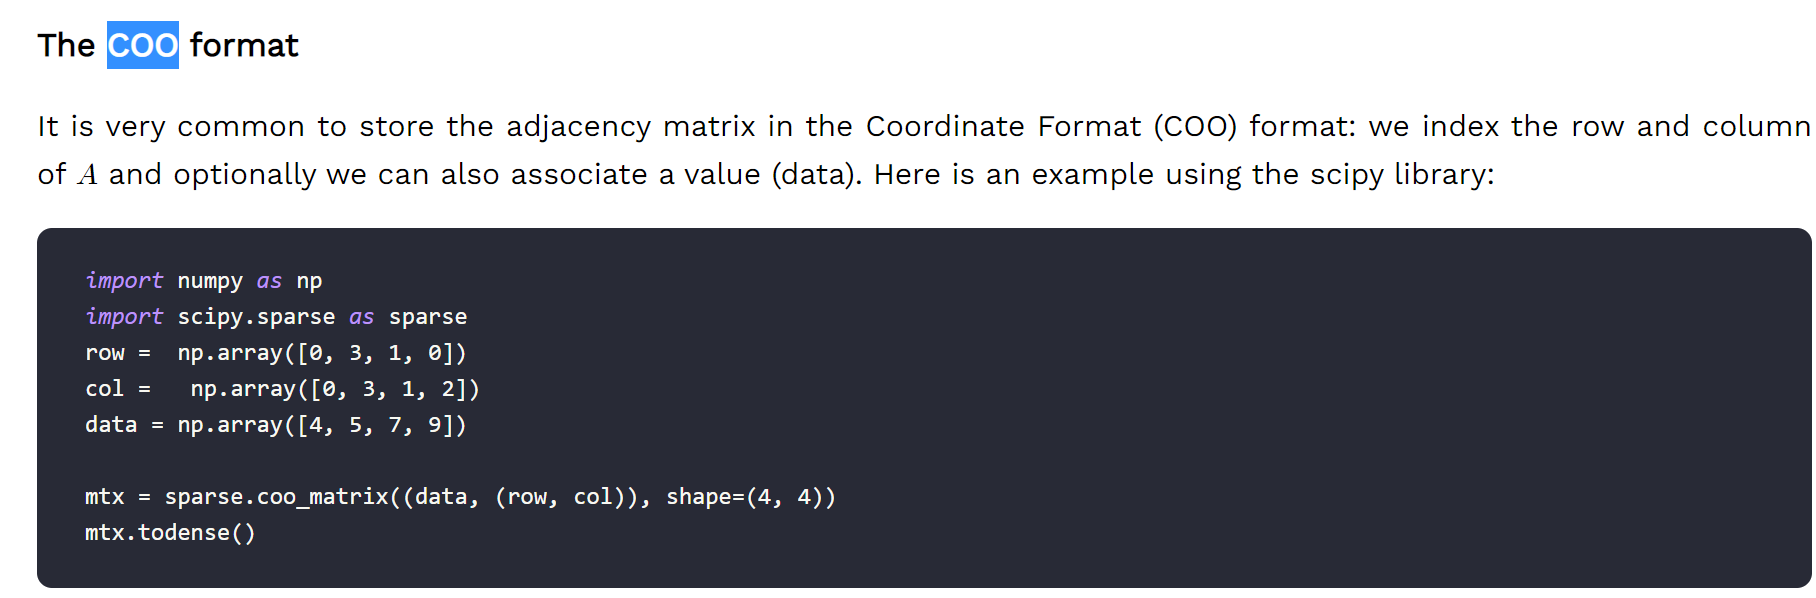

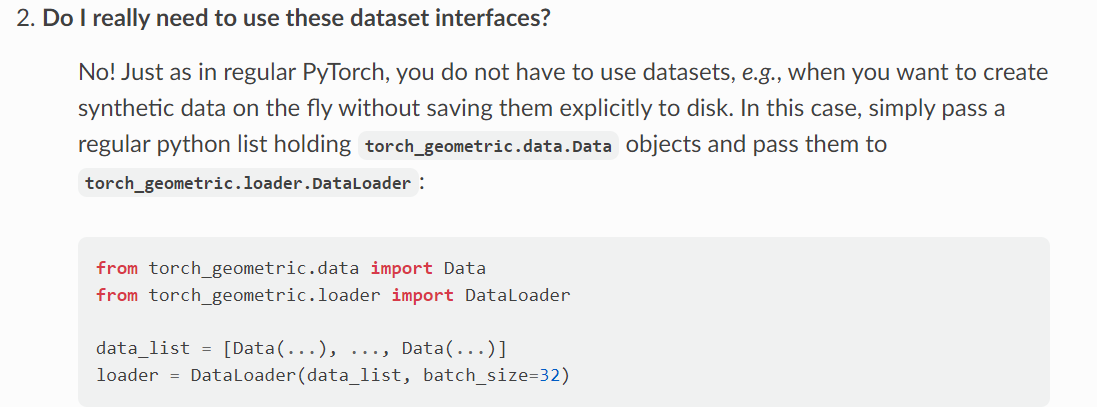

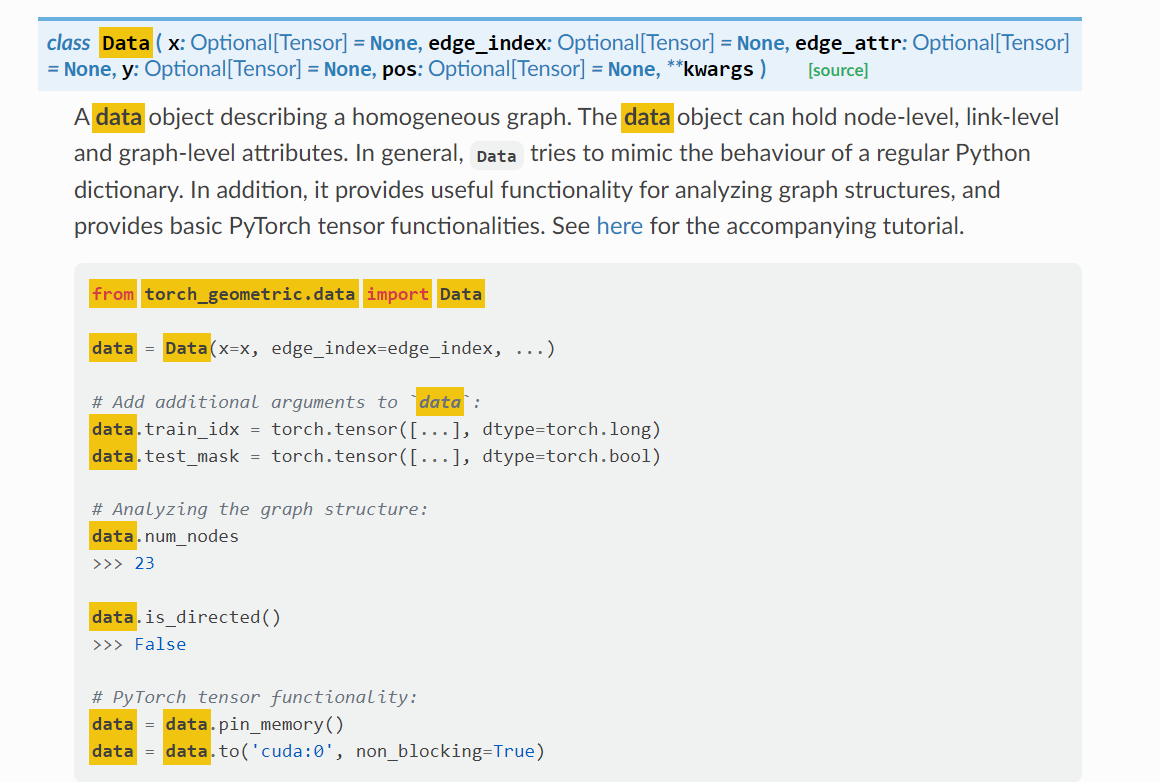

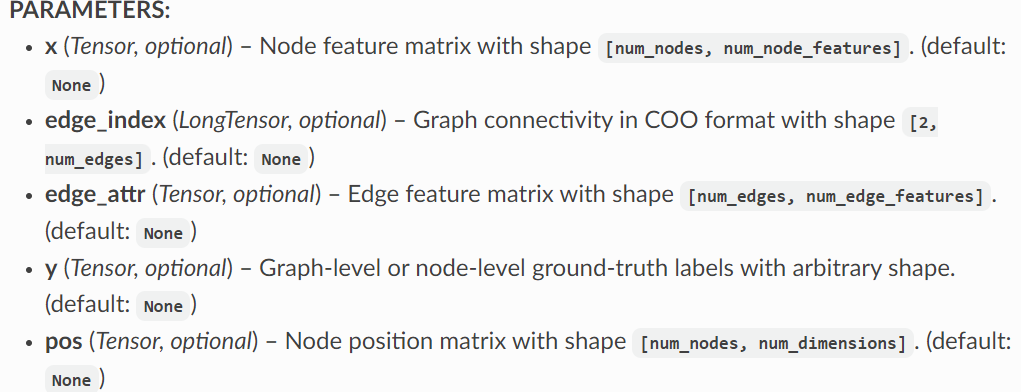

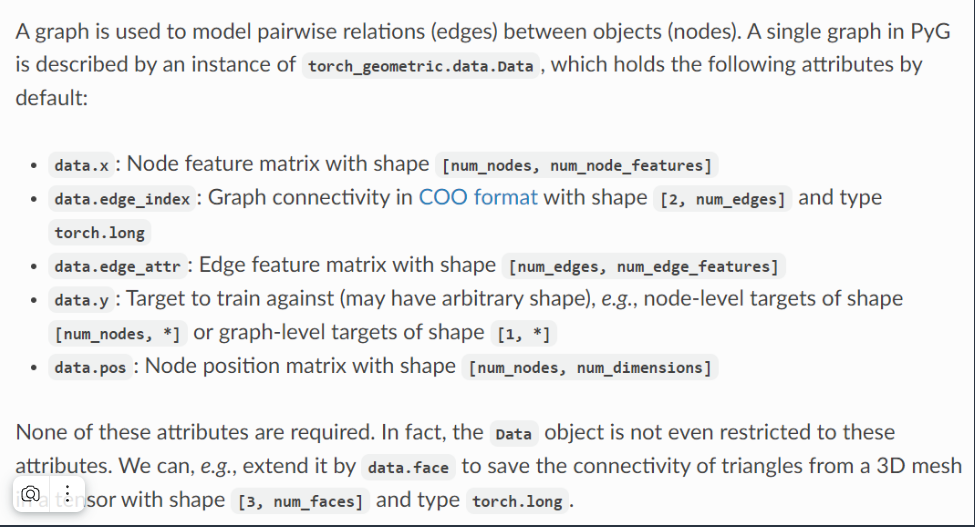

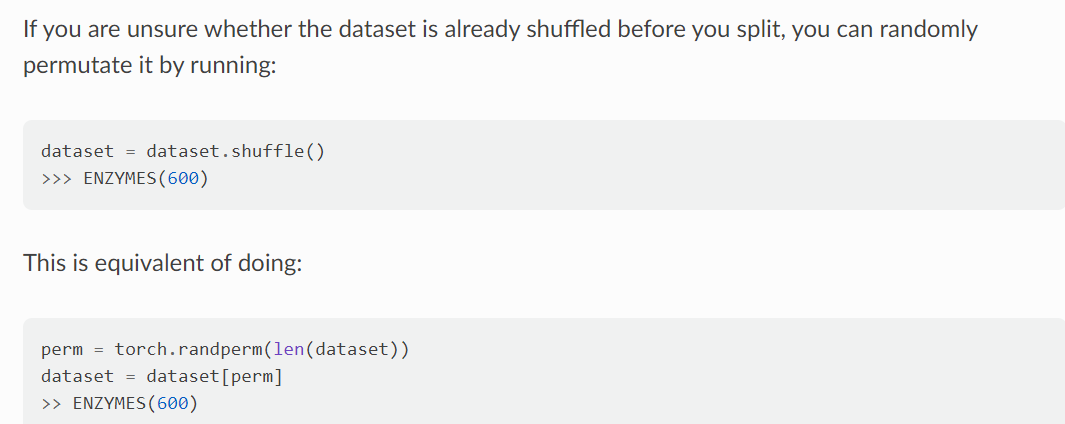

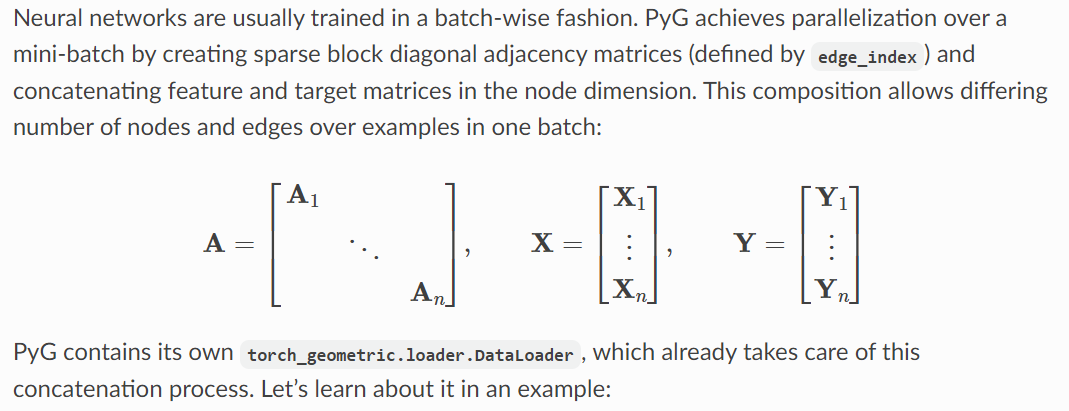

# import 

In [1]:
! nvidia-smi

Thu Dec  8 23:28:27 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 495.29.05    Driver Version: 495.29.05    CUDA Version: 11.5     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  NVIDIA GeForce ...  On   | 00000000:21:00.0 Off |                  N/A |
|  0%   46C    P8    25W / 350W |      1MiB / 24268MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
|   1  NVIDIA GeForce ...  On   | 00000000:44:00.0 Off |                  N/A |
| 30%   

In [1]:
import numpy as np
import uproot as ur
import h5py as h5
#from tqdm.auto import trange
import matplotlib.pyplot as plt
import scipy.sparse as sparse

import torch
import torch.nn.functional as F
from torch_geometric.data import Data
from torch_geometric.loader import DataLoader

import sys
sys.path.append("../scripts")
from datasets import Dataset_Polar_Azimut
from GNN_models import GCN_easy , GCN_model
from fits import fit_graph_model
from resolution import polar_vec_res_hist

root_path = '/home/leonov/Baikal/Gr_big_data/graphs/all_data/'
path_to_h5 =  "/home/leonov/Baikal/Gr_big_data/mc_baikal_norm_cut-8_ordered_with_MCarlo.h5"
dataset = Dataset_Polar_Azimut(root = root_path)

regime_inds = dataset.regime_inds
train_dataset = dataset[:regime_inds[0]]
test_dataset = dataset[regime_inds[0] : regime_inds[1]]
val_dataset = dataset[regime_inds[1] : regime_inds[2]]

train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=64, shuffle=False)
val_loader = DataLoader(val_dataset, batch_size=64, shuffle=False)

device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
#model = GCN_easy(dataset = dataset, hidden_size = 32).to(device)
#model = torch.load('../exps/Graph/example/model.pth')
#optimizer = torch.load('../exps/Graph/example/opt.pth')



# PRELU , 1 слой по 32

  0%|          | 0/20 [00:00<?, ?it/s]

Epoch: 000, LR: 0.000500, Train Loss: 0.0227567, Val Loss: 0.0190710, Test Loss: 0.0194120
Epoch: 001, LR: 0.000500, Train Loss: 0.0183053, Val Loss: 0.0168935, Test Loss: 0.0171859
Epoch: 002, LR: 0.000500, Train Loss: 0.0161522, Val Loss: 0.0147143, Test Loss: 0.0149893
Epoch: 003, LR: 0.000500, Train Loss: 0.0142114, Val Loss: 0.0139184, Test Loss: 0.0140877
Epoch: 004, LR: 0.000500, Train Loss: 0.0132124, Val Loss: 0.0129149, Test Loss: 0.0130560
Epoch: 005, LR: 0.000500, Train Loss: 0.0126735, Val Loss: 0.0135856, Test Loss: 0.0137350
Epoch: 006, LR: 0.000500, Train Loss: 0.0123501, Val Loss: 0.0123712, Test Loss: 0.0124939
Epoch: 007, LR: 0.000500, Train Loss: 0.0120923, Val Loss: 0.0117616, Test Loss: 0.0118991
Epoch: 008, LR: 0.000500, Train Loss: 0.0118839, Val Loss: 0.0116031, Test Loss: 0.0117410
Epoch: 009, LR: 0.000500, Train Loss: 0.0116764, Val Loss: 0.0128131, Test Loss: 0.0128938
Epoch: 010, LR: 0.000500, Train Loss: 0.0115070, Val Loss: 0.0113648, Test Loss: 0.0115036

/home/leonov/anaconda3/envs/leon_env/lib/python3.8/site-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


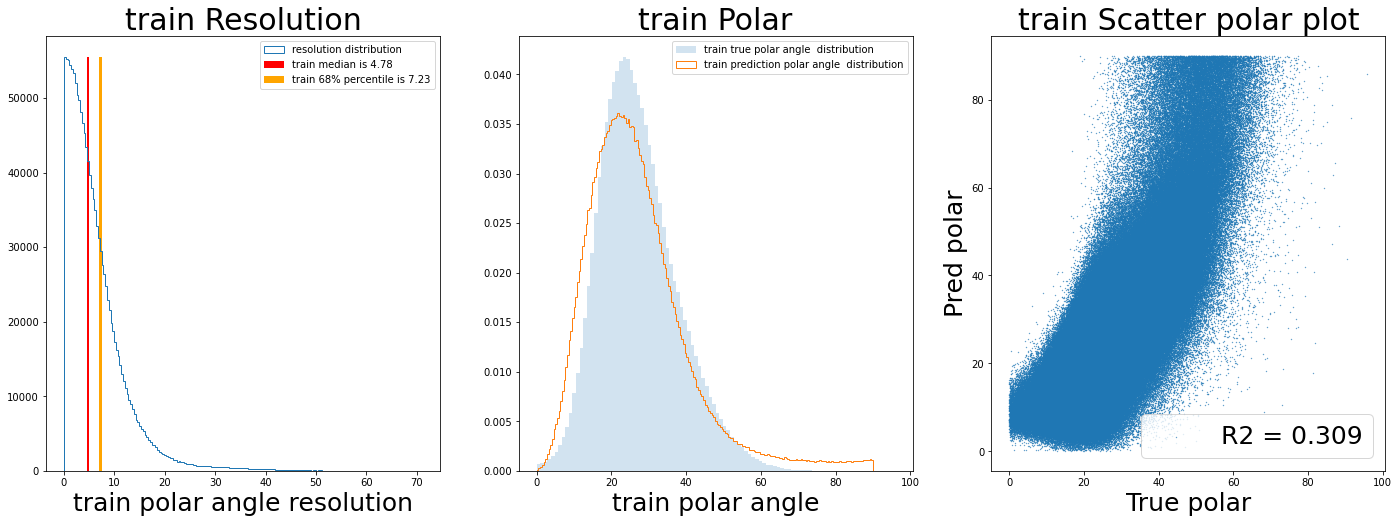

Printing resolution hists and angle distribution for test...  
test collect data...
test resolution calculation


/home/leonov/anaconda3/envs/leon_env/lib/python3.8/site-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


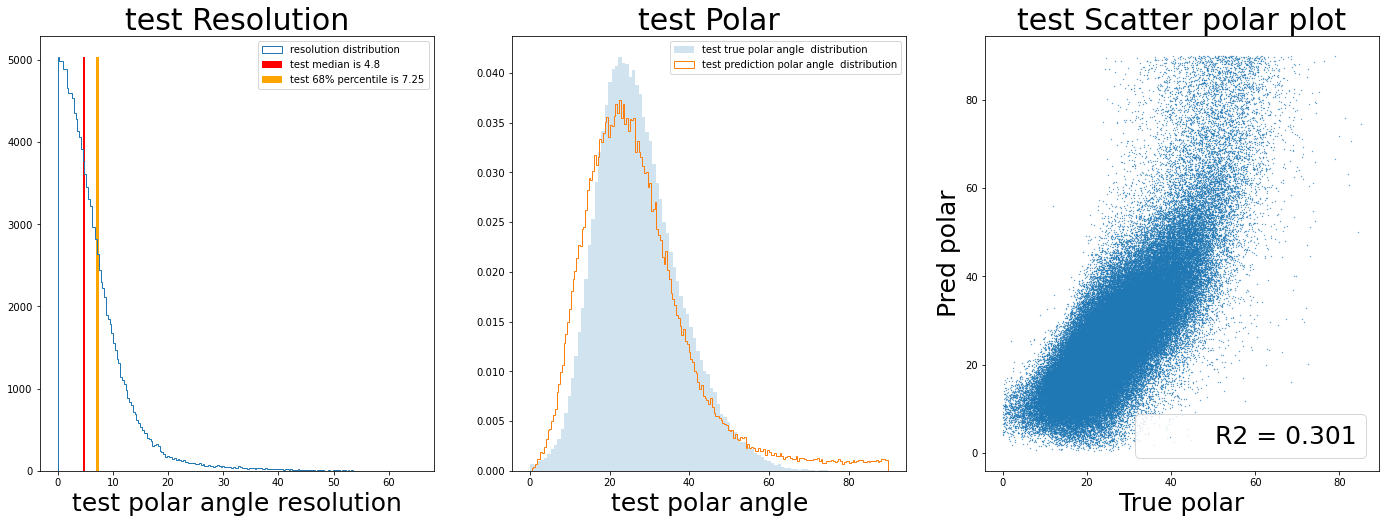

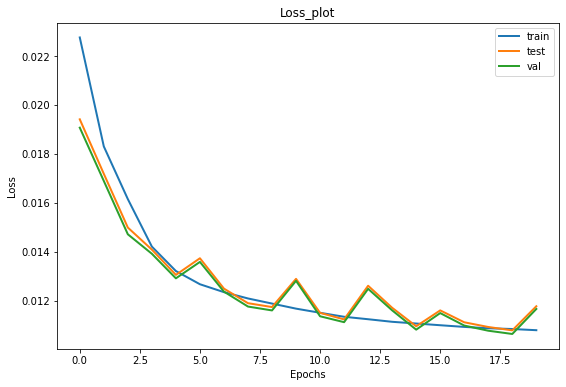

In [3]:
train_loss, test_loss, val_loss = fit_graph_model(model = model, optimizer = optimizer, device = device, 
                train_loader = train_loader,
                test_loader = test_loader,
                val_loader = val_loader,
                criterion = F.mse_loss, epochs = 20,
                exp_path = None, exp_name = None,                       
                path_begin = "/home/leonov/Baikal/Gr_big_data/exps/Graph",
                #train_loss = train_loss, test_loss = test_loss, val_loss = val_loss,
                pretrained_folder = None)

# PRELU , 2 слоя по 32

  0%|          | 0/10 [00:00<?, ?it/s]

Epoch: 000, LR: 0.000500, Train Loss: 0.0066583, Val Loss: 0.0066674, Test Loss: 0.0067394
Epoch: 001, LR: 0.000500, Train Loss: 0.0066582, Val Loss: 0.0066674, Test Loss: 0.0067394
Epoch: 002, LR: 0.000500, Train Loss: 0.0066582, Val Loss: 0.0066674, Test Loss: 0.0067394
Epoch: 003, LR: 0.000500, Train Loss: 0.0066581, Val Loss: 0.0066674, Test Loss: 0.0067394
Epoch: 004, LR: 0.000500, Train Loss: 0.0066582, Val Loss: 0.0066674, Test Loss: 0.0067394
Epoch: 005, LR: 0.000500, Train Loss: 0.0066582, Val Loss: 0.0066674, Test Loss: 0.0067394
Epoch: 006, LR: 0.000500, Train Loss: 0.0066582, Val Loss: 0.0066674, Test Loss: 0.0067394
Epoch: 007, LR: 0.000350, Train Loss: 0.0066582, Val Loss: 0.0066674, Test Loss: 0.0067394
Epoch: 008, LR: 0.000350, Train Loss: 0.0066581, Val Loss: 0.0066674, Test Loss: 0.0067394
Epoch: 009, LR: 0.000350, Train Loss: 0.0066581, Val Loss: 0.0066674, Test Loss: 0.0067394
Printing resolution hists and angle distribution for train...  
train collect data...
trai

/home/leonov/anaconda3/envs/leon_env/lib/python3.8/site-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


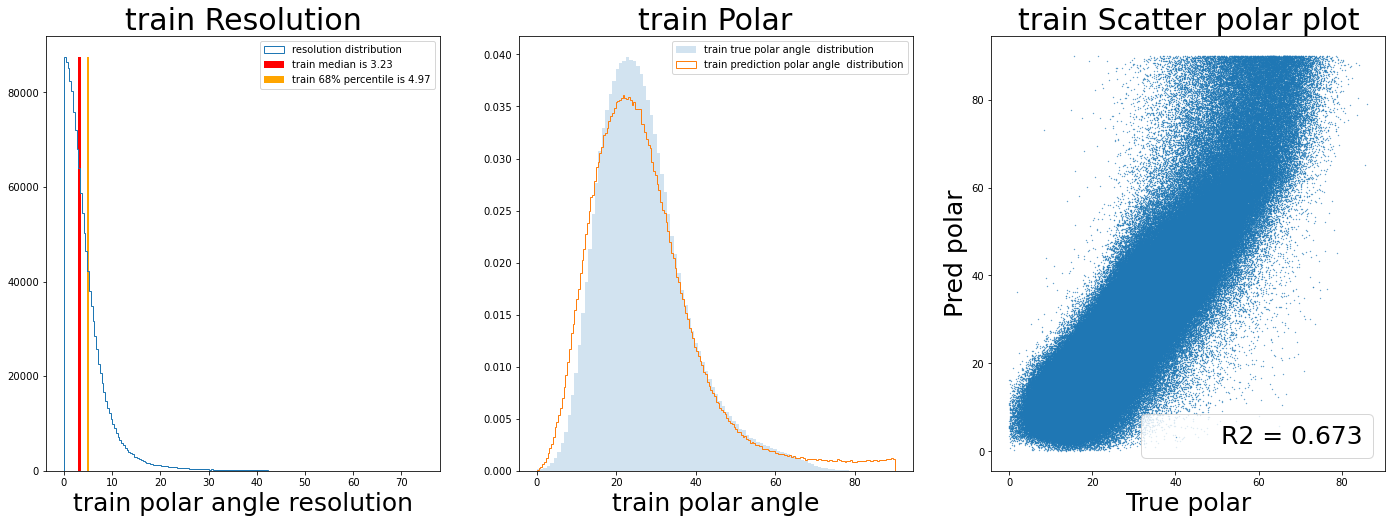

Printing resolution hists and angle distribution for test...  
test collect data...
test resolution calculation


/home/leonov/anaconda3/envs/leon_env/lib/python3.8/site-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


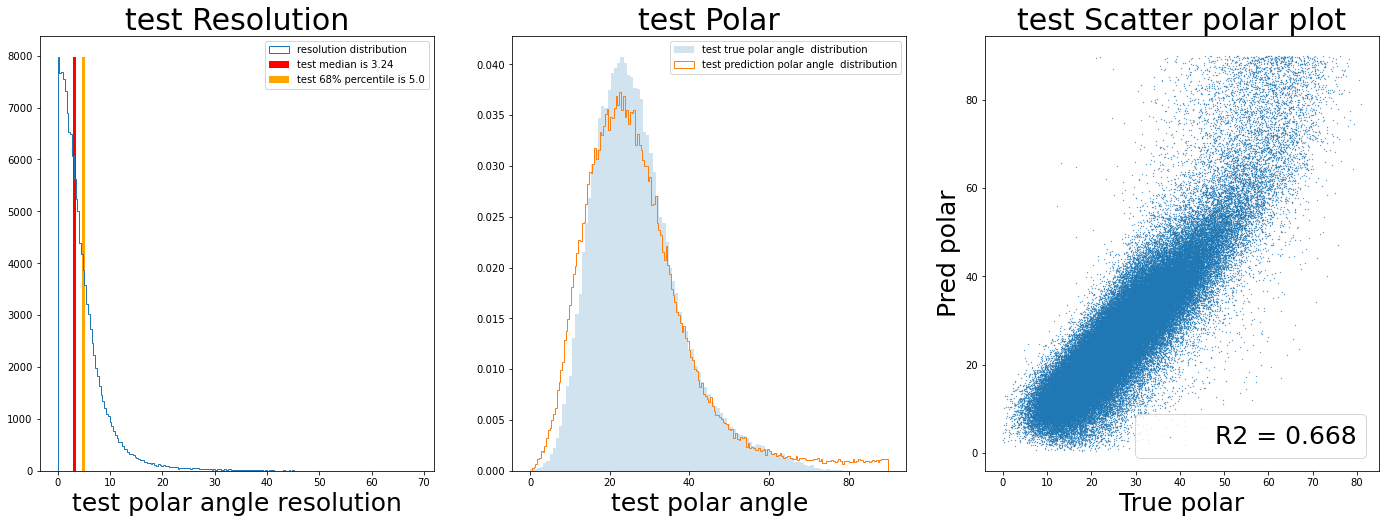

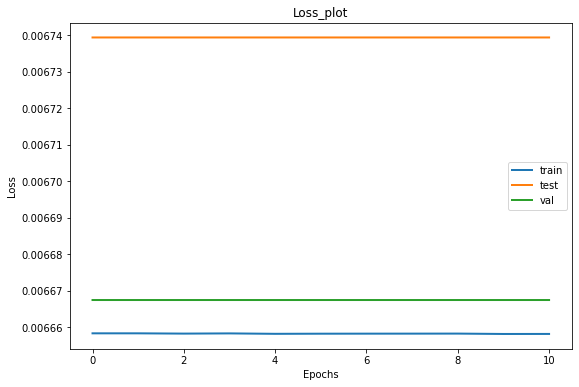

In [4]:
train_loss, test_loss, val_loss = fit_graph_model(model = model, optimizer = optimizer, device = device, 
                train_loader = train_loader,
                test_loader = test_loader,
                val_loader = val_loader,
                criterion = F.mse_loss, epochs = 10,
                exp_path = None, exp_name = None,                       
                path_begin = "/home/leonov/Baikal/Gr_big_data/exps/Graph",
                train_loss = train_loss, test_loss = test_loss, val_loss = val_loss,
                pretrained_folder = None)

# PReLU 3 слоя

In [2]:
model = GCN_model(dataset = dataset, activation = torch.nn.PReLU,
                  n_hidden_layers = 3,  out_size = 2,
                  hidden_size = 32).to(device)
optimizer = torch.optim.Adam(model.parameters(), lr=0.0005, weight_decay=5e-5)


train_loss, test_loss, val_loss = fit_graph_model(model = model, optimizer = optimizer, device = device, 
                train_loader = train_loader,
                test_loader = test_loader,
                val_loader = val_loader,
                criterion = F.mse_loss, epochs = 40,
                exp_path = "/home/leonov/Baikal/Gr_big_data/exps/Graph/3_layers", exp_name = "40_epochs_3_layers",                       
                path_begin = "/home/leonov/Baikal/Gr_big_data/exps/Graph",
                #train_loss = train_loss, test_loss = test_loss, val_loss = val_loss,
                pretrained_folder = None)

  2%|▎         | 1/40 [10:14<6:39:17, 614.30s/it]

Epoch: 001, LR: 0.000500, Train Loss: 0.0191058, Val Loss: 0.0145207, Test Loss: 0.0147749


  5%|▌         | 2/40 [16:45<5:05:57, 483.09s/it]

Epoch: 002, LR: 0.000500, Train Loss: 0.0121725, Val Loss: 0.0111425, Test Loss: 0.0113036


  8%|▊         | 3/40 [23:38<4:38:03, 450.90s/it]

Epoch: 003, LR: 0.000500, Train Loss: 0.0103255, Val Loss: 0.0099936, Test Loss: 0.0101424


 10%|█         | 4/40 [30:33<4:22:14, 437.06s/it]

Epoch: 004, LR: 0.000500, Train Loss: 0.0094669, Val Loss: 0.0086659, Test Loss: 0.0088216


 12%|█▎        | 5/40 [37:45<4:13:44, 435.00s/it]

Epoch: 005, LR: 0.000500, Train Loss: 0.0088560, Val Loss: 0.0085439, Test Loss: 0.0086469


 15%|█▌        | 6/40 [45:06<4:07:43, 437.17s/it]

Epoch: 006, LR: 0.000500, Train Loss: 0.0084000, Val Loss: 0.0086164, Test Loss: 0.0087287


 18%|█▊        | 7/40 [52:06<3:57:20, 431.53s/it]

Epoch: 007, LR: 0.000500, Train Loss: 0.0079236, Val Loss: 0.0072458, Test Loss: 0.0073338


 20%|██        | 8/40 [59:29<3:52:05, 435.19s/it]

Epoch: 008, LR: 0.000500, Train Loss: 0.0076155, Val Loss: 0.0078109, Test Loss: 0.0079188


 22%|██▎       | 9/40 [1:06:32<3:42:53, 431.41s/it]

Epoch: 009, LR: 0.000500, Train Loss: 0.0073691, Val Loss: 0.0077072, Test Loss: 0.0077526


 25%|██▌       | 10/40 [1:13:45<3:35:53, 431.77s/it]

Epoch: 010, LR: 0.000500, Train Loss: 0.0071524, Val Loss: 0.0071967, Test Loss: 0.0072943


 28%|██▊       | 11/40 [1:20:51<3:27:51, 430.05s/it]

Epoch: 011, LR: 0.000500, Train Loss: 0.0069609, Val Loss: 0.0068270, Test Loss: 0.0069085


 30%|███       | 12/40 [1:27:56<3:19:58, 428.51s/it]

Epoch: 012, LR: 0.000500, Train Loss: 0.0068008, Val Loss: 0.0066460, Test Loss: 0.0067489


 32%|███▎      | 13/40 [1:35:05<3:12:54, 428.70s/it]

Epoch: 013, LR: 0.000500, Train Loss: 0.0066593, Val Loss: 0.0062988, Test Loss: 0.0063792


 35%|███▌      | 14/40 [1:42:04<3:04:28, 425.70s/it]

Epoch: 014, LR: 0.000500, Train Loss: 0.0065317, Val Loss: 0.0066515, Test Loss: 0.0067086


 38%|███▊      | 15/40 [1:48:54<2:55:24, 421.00s/it]

Epoch: 015, LR: 0.000500, Train Loss: 0.0064367, Val Loss: 0.0064727, Test Loss: 0.0065696


 40%|████      | 16/40 [1:55:52<2:48:00, 420.03s/it]

Epoch: 016, LR: 0.000500, Train Loss: 0.0063228, Val Loss: 0.0064741, Test Loss: 0.0065612


 42%|████▎     | 17/40 [2:02:46<2:40:17, 418.14s/it]

Epoch: 017, LR: 0.000500, Train Loss: 0.0061943, Val Loss: 0.0062352, Test Loss: 0.0062924


 45%|████▌     | 18/40 [2:09:48<2:33:46, 419.40s/it]

Epoch: 018, LR: 0.000500, Train Loss: 0.0060852, Val Loss: 0.0058453, Test Loss: 0.0059379


 48%|████▊     | 19/40 [2:16:55<2:27:33, 421.59s/it]

Epoch: 019, LR: 0.000500, Train Loss: 0.0059996, Val Loss: 0.0066563, Test Loss: 0.0067106


 50%|█████     | 20/40 [2:24:08<2:21:40, 425.01s/it]

Epoch: 020, LR: 0.000500, Train Loss: 0.0059320, Val Loss: 0.0059137, Test Loss: 0.0059429


 52%|█████▎    | 21/40 [2:31:22<2:15:26, 427.73s/it]

Epoch: 021, LR: 0.000500, Train Loss: 0.0058924, Val Loss: 0.0058512, Test Loss: 0.0059563


 55%|█████▌    | 22/40 [2:38:26<2:08:00, 426.69s/it]

Epoch: 022, LR: 0.000500, Train Loss: 0.0058395, Val Loss: 0.0056011, Test Loss: 0.0056768


 57%|█████▊    | 23/40 [2:45:33<2:00:56, 426.84s/it]

Epoch: 023, LR: 0.000500, Train Loss: 0.0058018, Val Loss: 0.0057818, Test Loss: 0.0058730


 60%|██████    | 24/40 [2:52:14<1:51:43, 418.99s/it]

Epoch: 024, LR: 0.000500, Train Loss: 0.0057656, Val Loss: 0.0060435, Test Loss: 0.0061428


 62%|██████▎   | 25/40 [2:58:56<1:43:28, 413.92s/it]

Epoch: 025, LR: 0.000500, Train Loss: 0.0057261, Val Loss: 0.0055372, Test Loss: 0.0056186


 65%|██████▌   | 26/40 [3:05:33<1:35:25, 408.94s/it]

Epoch: 026, LR: 0.000500, Train Loss: 0.0056817, Val Loss: 0.0052575, Test Loss: 0.0053564


 68%|██████▊   | 27/40 [3:12:04<1:27:24, 403.39s/it]

Epoch: 027, LR: 0.000500, Train Loss: 0.0056576, Val Loss: 0.0056034, Test Loss: 0.0056900


 70%|███████   | 28/40 [3:18:48<1:20:45, 403.77s/it]

Epoch: 028, LR: 0.000500, Train Loss: 0.0056545, Val Loss: 0.0055220, Test Loss: 0.0055723


 72%|███████▎  | 29/40 [3:25:10<1:12:47, 397.08s/it]

Epoch: 029, LR: 0.000500, Train Loss: 0.0056240, Val Loss: 0.0053045, Test Loss: 0.0053870


 75%|███████▌  | 30/40 [3:31:45<1:06:04, 396.44s/it]

Epoch: 030, LR: 0.000500, Train Loss: 0.0055942, Val Loss: 0.0052989, Test Loss: 0.0053970


 78%|███████▊  | 31/40 [3:38:12<59:03, 393.76s/it]  

Epoch: 031, LR: 0.000500, Train Loss: 0.0055759, Val Loss: 0.0053974, Test Loss: 0.0054801


 80%|████████  | 32/40 [3:44:46<52:31, 393.88s/it]

Epoch: 032, LR: 0.000500, Train Loss: 0.0055215, Val Loss: 0.0075565, Test Loss: 0.0076620


 82%|████████▎ | 33/40 [3:50:54<45:02, 386.06s/it]

Epoch: 033, LR: 0.000350, Train Loss: 0.0052208, Val Loss: 0.0050109, Test Loss: 0.0050821


 85%|████████▌ | 34/40 [3:57:23<38:41, 386.84s/it]

Epoch: 034, LR: 0.000350, Train Loss: 0.0051918, Val Loss: 0.0051925, Test Loss: 0.0052706


 88%|████████▊ | 35/40 [4:03:58<32:26, 389.23s/it]

Epoch: 035, LR: 0.000350, Train Loss: 0.0051659, Val Loss: 0.0051782, Test Loss: 0.0052262


 90%|█████████ | 36/40 [4:10:10<25:36, 384.18s/it]

Epoch: 036, LR: 0.000350, Train Loss: 0.0051538, Val Loss: 0.0049345, Test Loss: 0.0050101


 92%|█████████▎| 37/40 [4:16:43<19:20, 386.88s/it]

Epoch: 037, LR: 0.000350, Train Loss: 0.0051438, Val Loss: 0.0052120, Test Loss: 0.0052889


 95%|█████████▌| 38/40 [4:23:22<13:00, 390.32s/it]

Epoch: 038, LR: 0.000350, Train Loss: 0.0051263, Val Loss: 0.0053248, Test Loss: 0.0054070


 98%|█████████▊| 39/40 [4:29:58<06:32, 392.13s/it]

Epoch: 039, LR: 0.000350, Train Loss: 0.0051144, Val Loss: 0.0049683, Test Loss: 0.0050196


100%|██████████| 40/40 [4:36:05<00:00, 414.14s/it]

Epoch: 040, LR: 0.000350, Train Loss: 0.0051107, Val Loss: 0.0055435, Test Loss: 0.0056247


RuntimeError: Parent directory /home/leonov/Baikal/Gr_big_data/exps/Graph/3_layers/States does not exist.

In [ ]:
torch.save(model, '../exps/Graph/example/model.pth')
torch.save(optimizer, '../exps/Graph/example/opt.pth')
#model = torch.load('model.pth')
#torch.save(model.state_dict(), '../exps/Graph/model.pth')

# GAT

In [ ]:
GATConv(in_channels, out_channels, heads int = 1,
             concat = True, negative_slope = 0.2,
             dropout = 0.0, add_self_loops = True,
             edge_dim = None,
             fill_value = 'mean', bias = True)



class GAT(torch.nn.Module):
    def __init__(self, in_channels, hidden_channels, out_channels, heads):
        super().__init__()
        self.conv1 = GATConv(in_channels, hidden_channels, heads, dropout=0.6)
        # On the Pubmed dataset, use `heads` output heads in `conv2`.
        self.conv2 = GATConv(hidden_channels * heads, out_channels, heads=1,
                             concat=False, dropout=0.6)

    def forward(self, x, edge_index):
        #x = F.dropout(x, p=0.6, training=self.training)
        x = F.elu(self.conv1(x, edge_index))
        #x = F.dropout(x, p=0.6, training=self.training)
        x = self.conv2(x, edge_index)
        return x


model = GAT(dataset.num_features, args.hidden_channels, dataset.num_classes,
            args.heads).to(device)
optimizer = torch.optim.Adam(model.parameters(), lr=0.005, weight_decay=5e-4)

#       out = self.set2set(out, data.batch)
        # Apply a Set2Set pooling operation from
        # "Order Matters: Sequence to sequence for sets"
        # https://arxiv.org/abs/1511.06391 paper

In [ ]:
class ConvNetSame(torch.nn.Module):
    def __init__(self, hidden_dim: int, n_convs: int):
        """
        Args:
            hidden_dim: the number of units used in the hidden layers
            n_convs: the number of applications of the GCNN layer
        """
        super().__init__()
        self.n_convs = n_convs
        self.lin0 = torch.nn.Linear(dataset.num_features, hidden_dim)
        self.conv = GCNConv(hidden_dim, hidden_dim)
        self.set2set = Set2Set(hidden_dim, processing_steps=1)
        self.lin1 = torch.nn.Linear(2 * hidden_dim, hidden_dim)
        self.lin2 = torch.nn.Linear(hidden_dim, 1)

    def forward(self, data: torch_geometric.data.Data) -> torch_geometric.data.Data:
        out = F.relu(self.lin0(data.x))

        # Remember, you need to pass the graph through the same
        # layer n_convs times, like in a recurrent network
        # Use ReLu activation
        for i in range(self.n_convs):
          out = F.relu(self.conv(out, data.edge_index))
        out = self.set2set(out, data.batch)
        out = F.relu(self.lin1(out))
        out = self.lin2(out)
        return out.view(-1)

# The final and most diffucult task is to create a model that would use the continuous kernel-based convolutional operator from the "Neural Message Passing for Quantum Chemistry" paper. It's implemented in pytorch-geometric as NNConv and the documentation is available here, [2 points].

In [ ]:
#from torch_geometric.nn.conv import nn_conv
class PaperNet(torch.nn.Module):
    def __init__(self, hidden_dim: int, n_convs: int):
        """
        Args:
            hidden_dim: the number of units used in the hidden layers
            n_convs: the number of applications of the GCNN layer
        """
        super().__init__()
        self.n_convs = n_convs
        self.lin0 = torch.nn.Linear(dataset.num_features, hidden_dim)
        self.nn_model = Sequential(Linear(5, hidden_dim*2),
                                    ReLU(),
                                    Linear(hidden_dim*2, hidden_dim * hidden_dim)            
        )
        self.conv = NNConv(in_channels = hidden_dim, out_channels = hidden_dim, nn = self.nn_model )


        # Define the NNConv layer and the fully-connected nerual network
        # inside it. The suggested structure for the FCN is
        # Linear(5, hidden_dim*2)
        # ReLu activation
        # Linear(hidden_dim*2, hidden_dim * hidden_dim)
        ### YOUR CODE HERE

        self.set2set = Set2Set(hidden_dim, processing_steps=1)
        self.lin1 = torch.nn.Linear(2 * hidden_dim, hidden_dim)
        self.lin2 = torch.nn.Linear(hidden_dim, 1)

    def forward(self, data: torch_geometric.data.Data) -> torch_geometric.data.Data:
        out = F.relu(self.lin0(data.x))
        # Pass the graph through the same NNConv
        # layer n_convs times, like in a recurrent network
        # Use ReLu activation
        ### YOUR CODE HERE
        for i in range(self.n_convs):
          out = F.relu(self.conv(out, data.edge_index, data.edge_attr))
        out = self.set2set(out, data.batch)
        out = F.relu(self.lin1(out))
        out = self.lin2(out)
        return out.view(-1)

# to save

In [9]:
#torch.save(model, '../exps/Graph/example/model.pth')
#torch.save(optimizer, '../exps/Graph/example/opt.pth')
#model = torch.load('model.pth')
#torch.save(model.state_dict(), '../exps/Graph/model.pth')

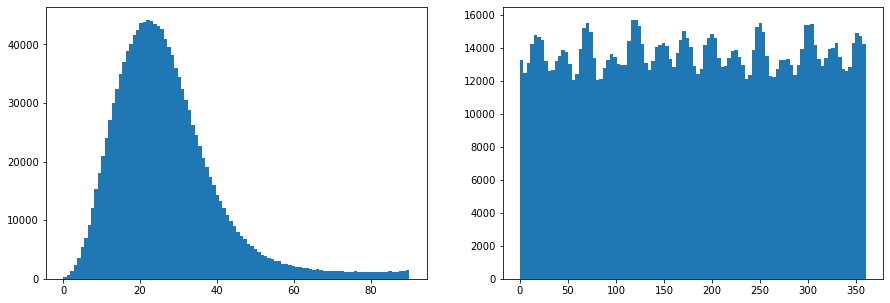

In [11]:
with h5.File(path_to_h5, 'r') as hf:
    plt.figure(figsize=(15,5))
    plt.subplot(1,2,1)
    plt.hist(hf['train/ev_chars'][:,0], bins = 100)
    plt.subplot(1,2,2)
    plt.hist(hf['train/ev_chars'][:,1], bins = 100)

## COO edges 35

In [ ]:
##
# make big COO format
##
k, l = 2, 32
rows, cols = [], []
# only for k_neighbours = 2 , i think no more is needed
for i in range(l):
    if i ==0: 
        rows += [i] * k
        cols += [ind for ind in range(k)]
    elif i == l - 1:
        rows += [i] * k
        cols += [ind for ind in range(l - k, l)]
    else: 
        rows += [i] * (k + 1)
        cols += [i-1,i,i+1] # heh

edge_32 = torch.cat((torch.tensor(rows)[None,:], torch.tensor(cols)[None,:]),0)
edge_32.shape

'''
row_32, col_32 = np.array(row_32), np.array(col_32)
edge_32 = np.concatenate((row_32[None,:], col_32[None,:]),0)

data_32 = np.ones(row_32.size)#[1 for i in range(len(row))]
print(edge_32.shape , data_32.shape)
mtx = sparse.coo_matrix((data_32, (edge_32[0], edge_32[1])), shape=(32, 32))
mtx.todense()
'''

In [2]:
row =  np.array([0, 3, 1, 0])
col =   np.array([0, 3, 1, 2])
data = np.array([4, 5, 7, 9])

mtx = sparse.coo_matrix((data, (row, col)), shape=(4, 4))
mtx.todense()

matrix([[4, 0, 9, 0],
        [0, 7, 0, 0],
        [0, 0, 0, 0],
        [0, 0, 0, 5]])

In [ ]:
n_nodes = 6
n_edges = 3* n_nodes - 2
mtx = sparse.coo_matrix((data_32[:n_edges], (row_32[:n_edges], col_32[:n_edges])),
                        shape=(n_nodes, n_nodes))
mtx.todense()

In [3]:
row =  np.array([0,0,1,1,1,2,2,2,3,3,3,4,4])
col =  np.array([0,1,0,1,2,1,2,3,2,3,4,3,4])
data = np.array([1,1,1,1,1,1,1,1,1,1,1,1,1])

mtx = sparse.coo_matrix((data, (row, col)), shape=(5, 5))
mtx.todense()

matrix([[1, 1, 0, 0, 0],
        [1, 1, 1, 0, 0],
        [0, 1, 1, 1, 0],
        [0, 0, 1, 1, 1],
        [0, 0, 0, 1, 1]])

##  info

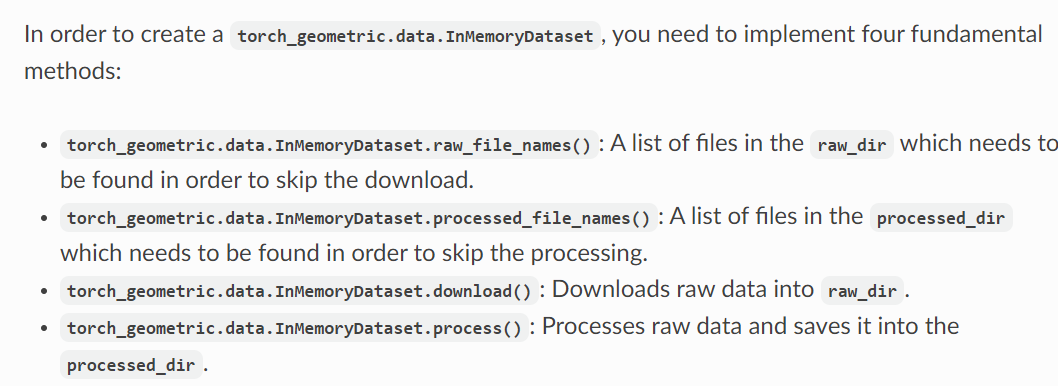

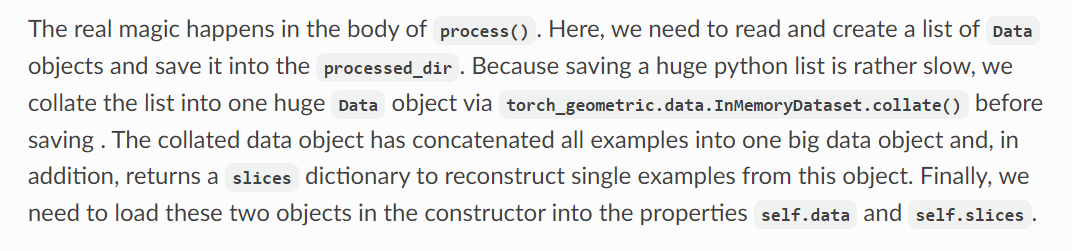

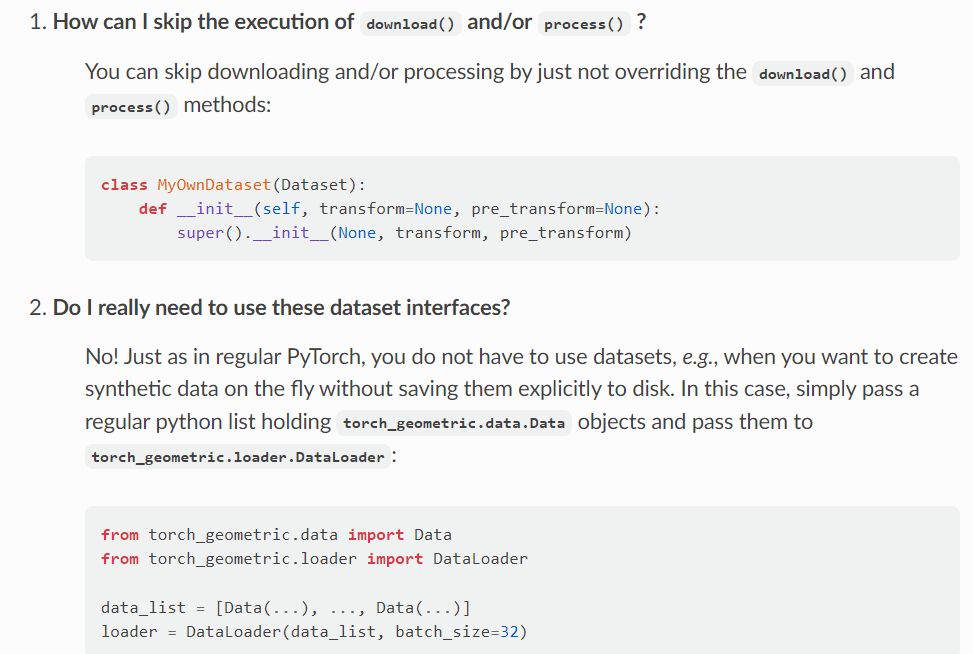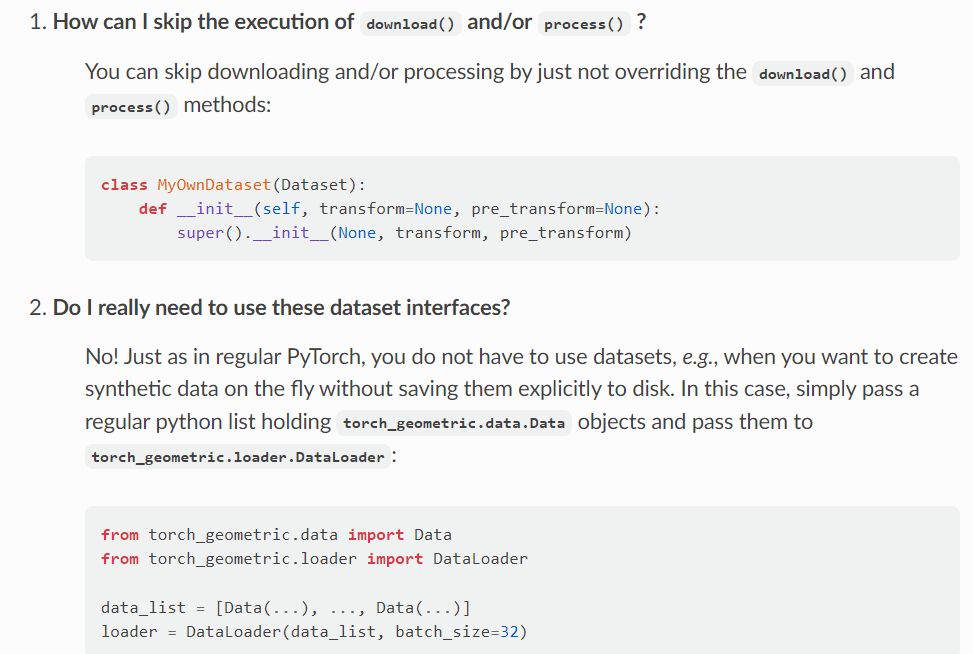

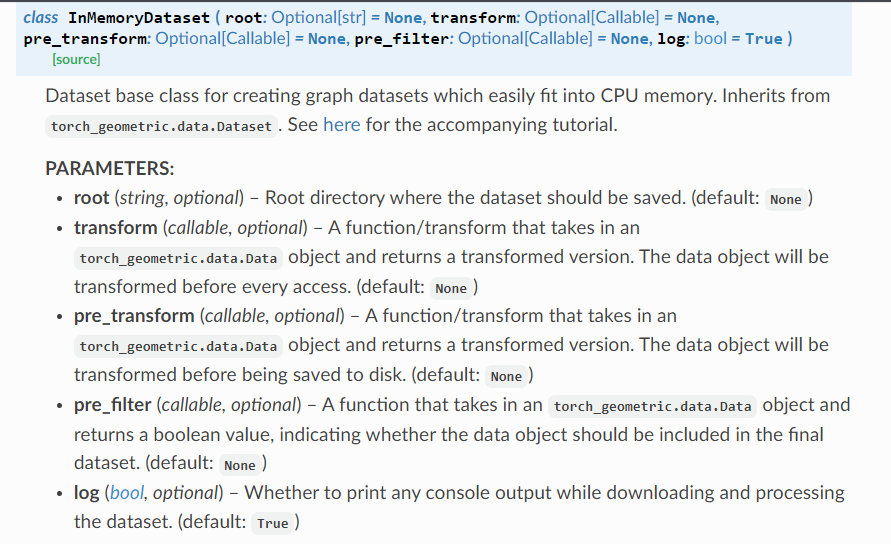

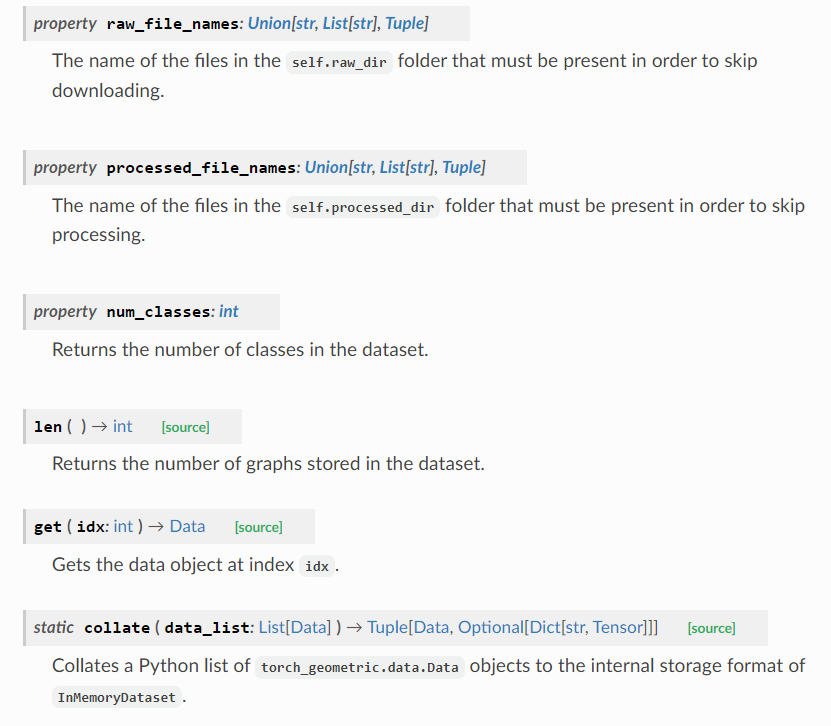

In [ ]:
k, l = 2, 35 # only for k_neighbours = 2 , i think no more is not needed
rows, cols = [], []       
for i in range(l):
    if i ==0: 
        rows += [i] * k
        cols += [ind for ind in range(k)]
    elif i == l - 1:
        rows += [i] * k
        cols += [ind for ind in range(l - k, l)]
    else: 
        rows += [i] * (k + 1)
        cols += [i-1,i,i+1] 
edges =  torch.cat((torch.tensor(rows)[None,:], torch.tensor(cols)[None,:]),0)

In [17]:
def make_graph(ind, regime = 'train',edges = edges):
    with h5.File(path_to_h5, 'r') as hf:
        n_nodes = int(np.sum(hf[f"{regime}/mask"][ind],axis =-1))
        n_edges = 3* n_nodes - 2

        edge_indexes = edges[:,:n_edges]
        # t, Q, x,y,z ( not sure about first two order)
        # data as [cases_length, 35,5]
        x = torch.FloatTensor(hf[regime + '/data/'][ind,:n_nodes])

        polar = torch.FloatTensor([hf[regime + '/ev_chars'][i,0] * (np.pi) / 180])[None,:]
        y = torch.cat((torch.sin(polar), torch.cos(polar)) ,axis=1)

        return Data(x=x, edge_index=edge_indexes, y = y, pure_polar = polar)  
make_graph(0)

Data(x=[9, 5], edge_index=[2, 25], y=[1, 2], pure_polar=[1, 1])

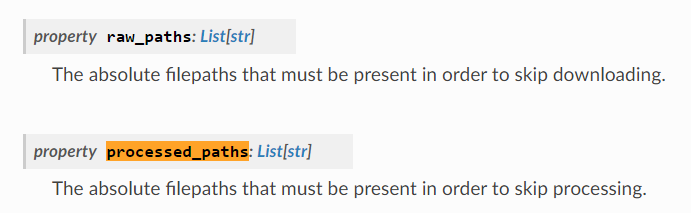

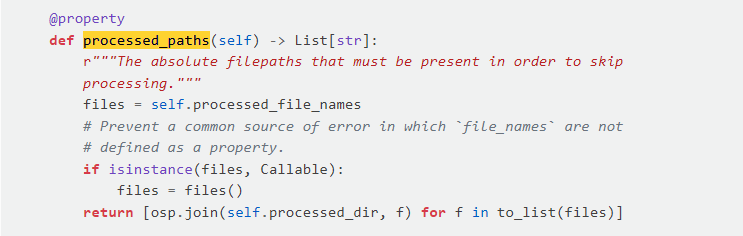

## dataset info

# Another GCNNs
Define a transformation of the input data. `SelectTarget` selects the target column and `torch_geometric.transforms.Distance` appends Euclidean distance between `pos` vectors to the edge attributes.

In [ ]:
'''
transform = T.Compose([SelectTarget(TARGET_Y), T.Distance(norm=False)])
torch.manual_seed(42)
'''


In [58]:
import os.path as osp

import torch
import torch.nn.functional as F
from torch_geometric.nn import SAGEConv
from torch.nn import Linear, ReLU, Sequential


In [ ]:
class Conv2Net(torch.nn.Module):
    def __init__(self, hidden_dim: int):
        """
        Args:
            hidden_dim: the number of units used in the hidden layers
        """
        super().__init__()
        self.lin0 = torch.nn.Linear(dataset.num_features, hidden_dim)
        
        # Define two layers. Remember, to have two layers with
        # different 
        self.conv_1 = GCNConv(hidden_dim, 3*hidden_dim)
        self.conv_2 = GCNConv(3*hidden_dim, hidden_dim)

        self.set2set = Set2Set(hidden_dim, processing_steps=1)
        self.lin1 = torch.nn.Linear(2 * hidden_dim, hidden_dim)
        self.lin2 = torch.nn.Linear(hidden_dim, 1)

    def forward(self, data: torch_geometric.data.Data) -> torch_geometric.data.Data:
        out = F.relu(self.lin0(data.x))

        # Apply the GCNN layers. Don't forget ReLu
        ### YOUR CODE HERE

        # 
        out = F.relu(self.conv_1(out, data.edge_index))
        out = F.relu(self.conv_2(out, data.edge_index))

        out = self.set2set(out, data.batch)
        out = F.relu(self.lin1(out))
        out = self.lin2(out)
        return out.view(-1)

In [ ]:
class PaperNet(torch.nn.Module):
    def __init__(self, hidden_dim: int, n_convs: int):
        """
        Args:
            hidden_dim: the number of units used in the hidden layers
            n_convs: the number of applications of the GCNN layer
        """
        super().__init__()
        self.n_convs = n_convs
        self.lin0 = torch.nn.Linear(dataset.num_features, hidden_dim)

        # Define the NNConv layer and the fully-connected nerual network
        # inside it. The suggested structure for the FCN is
        # Linear(5, hidden_dim*2)
        # ReLu activation
        # Linear(hidden_dim*2, hidden_dim * hidden_dim)
        
        mlp = torch.nn.Sequential(torch.nn.Linear(5, hidden_dim*2), 
                                  torch.nn.ReLU(), 
                                  torch.nn.Linear(hidden_dim*2, hidden_dim**2))
        self.nn_conv = NNConv(hidden_dim, hidden_dim, mlp) 


        self.set2set = Set2Set(hidden_dim, processing_steps=1)
        self.lin1 = torch.nn.Linear(2 * hidden_dim, hidden_dim)
        self.lin2 = torch.nn.Linear(hidden_dim, 1)

    def forward(self, data: torch_geometric.data.Data) -> torch_geometric.data.Data:
        out = F.relu(self.lin0(data.x))
        # Pass the graph through the same NNConv
        # layer n_convs times, like in a recurrent network
        # Use ReLu activation
        for i in range (self.n_convs):
          out = self.nn_conv(out,data.edge_index, data.edge_attr)
          out = F.relu(out)
        
        out = self.set2set(out, data.batch)
        out = F.relu(self.lin1(out))
        out = self.lin2(out)
        return out.view(-1)

In [ ]:
class Net(torch.nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        
        self.conv = SAGEConv(dataset.num_features,
                             dataset.num_classes,
                             aggr="mean") # max, mean, add ...)

    def forward(self):
        return self.conv(data.x, data.edge_index)
    
device = torch.device('cuda:0' if torch.cuda.is_available() and use_cuda_if_available else 'cpu')
model, data = Net().to(device), data.to(device)
optimizer = torch.optim.Adam(model.parameters(), lr=0.01, weight_decay=5e-4)
###############
# test and val
###############
#nn.MSELoss
def train():
    model.train()
    optimizer.zero_grad()
    F.l1_loss(model()[data.train_mask], data.y[data.train_mask]).backward()
    optimizer.step()


def test():
    model.eval()
    logits, accs = model(), []
    for _, mask in data('train_mask', 'val_mask', 'test_mask'):
        pred = logits[mask].max(1)[1]
        acc = pred.eq(data.y[mask]).sum().item() / mask.sum().item()
        accs.append(acc)
    return accs

best_val_acc = test_acc = 0
for epoch in range(1,100):
    train()
    _, val_acc, tmp_test_acc = test()
    if val_acc > best_val_acc:
        best_val_acc = val_acc
        test_acc = tmp_test_acc
    log = 'Epoch: {:03d}, Val: {:.4f}, Test: {:.4f}'
    
    if epoch % 10 == 0:
        print(log.format(epoch, best_val_acc, test_acc))

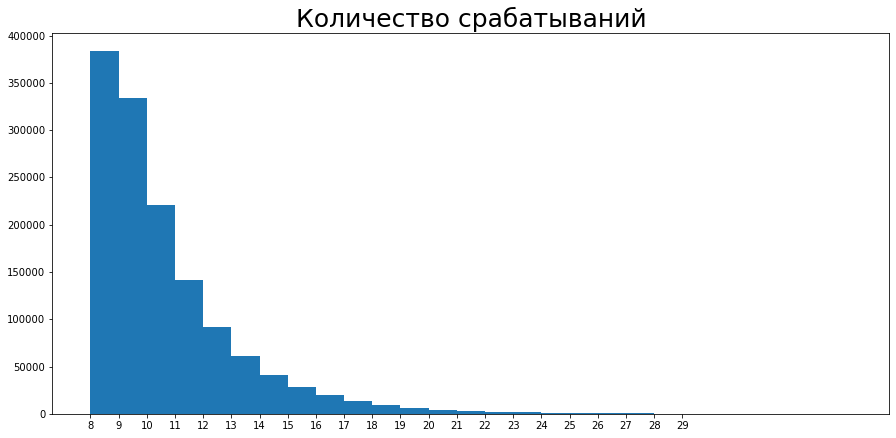

In [38]:
path_to_h5 = '/home/leonov/Baikal/Gr_big_data/mc_baikal_norm_cut-8_ordered_with_MCarlo.h5'
with h5.File(path_to_h5, 'r') as hf:
    plt.figure(figsize=(15,7))
    a = np.sum(hf["train/mask"],axis =1)
    #a = a[a <30]
    a = plt.hist(a,bins = 27)
    plt.xticks(np.arange(8,30))
    plt.title("Количество срабатываний",fontsize = 25)
    plt.show()


##  another datasets

In [ ]:
'''
import torch
from torch_geometric.data import InMemoryDataset #, download_url
from tqdm import tqdm

# here are some notes for you to understand. 
class Dataset_Polar_Pure(InMemoryDataset):
    def __init__(self, root, transform=None, pre_transform=None):
        super().__init__(root, transform, pre_transform)
        self.data, self.slices = torch.load(self.processed_paths[0])
                
    # returns the dataset source file name 
    @property
    def regime_lengths(self):
        return [1365465, 133807, 134335]
    
    @property
    def regime_inds(self):
        return np.cumsum(self.regime_lengths)
    
    @property
    def raw_file_names(self):
        start = '/home/leonov/Baikal/Gr_big_data/graphs/polar_cos_sin/raw'
        #return [f'{start}/{regime}_raw' for regime in ['train','test','val']]
        return [f'{start}/all_raw_data.pt']
    
    # returns the save file name required by the process method 。 the name of the dataset you saved later is the same as that in the list 
    @property
    def processed_file_names(self):
        start = '/home/leonov/Baikal/Gr_big_data/graphs/polar_cos_sin/processed/'
        return [f'{start}/all_data.pt']
        #return [f'{start}/{regime}_data.pt' for regime in ['train','test','val']]
    
    '''
    # used to download datasets from the internet 
    def download(self):
        # Download to `self.raw_dir`.
        download_url(url, self.raw_dir)
        ...
    '''
    
    @property
    def path_to_h5(self):
        return "/home/leonov/Baikal/Gr_big_data/mc_baikal_norm_cut-8_ordered_with_MCarlo.h5"
    
    # make big COO format
    @property
    def edges(self):    
        k, l = 2, 35 # only for k_neighbours = 2 , i think no more is not needed
        rows, cols = [], []       
        for i in range(l):
            if i ==0: 
                rows += [i] * k
                cols += [ind for ind in range(k)]
            elif i == l - 1:
                rows += [i] * k
                cols += [ind for ind in range(l - k, l)]
            else: 
                rows += [i] * (k + 1)
                cols += [i-1,i,i+1] 
        return torch.cat((torch.tensor(rows)[None,:], torch.tensor(cols)[None,:]),0)

    def make_graph(self, ind, regime = 'train'):
        with h5.File(self.path_to_h5, 'r') as hf:
            n_nodes = int(np.sum(hf[f"{regime}/mask"][ind], axis =-1))
            n_edges = 3* n_nodes - 2

            edge_indexes = self.edges[:,:n_edges]
            # t, Q, x,y,z ( not sure about first two order)
            # data as [cases_length, 35,5]
            x = torch.FloatTensor(hf[regime + '/data/'][ind,:n_nodes])

            polar = torch.FloatTensor([hf[regime + '/ev_chars'][ind,0] * (np.pi) / 180])[None,:]
            #y = torch.cat((torch.sin(polar), torch.cos(polar)), axis=1)

        return Data(x = x, edge_index = edge_indexes, y = polar)  
    
    # the method used to generate the dataset 
    def process(self):
        data_list = []
        # Read data into huge `Data` list.
        for i, regime in tqdm(enumerate(['train', 'test', 'val'])):
            data_list += [self.make_graph(_ind, regime) for _ind in range(self.regime_lengths[i]) ] #self.regime_lengths[0]

            if self.pre_filter is not None:
                data_list = [data for data in data_list if self.pre_filter(data)]

            if self.pre_transform is not None:
                data_list = [self.pre_transform(data) for data in data_list]

        data, slices = self.collate(data_list)
        torch.save((data, slices), self.processed_paths[0])
        '''